In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Custom dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data).float()
        self.targets = torch.tensor(targets.values).long()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y
    
class MLP_1(torch.nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
        )
    
    def forward(self,x):
        return self.model(x)
        
class MLP_2(torch.nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        
    def forward(self, x):
        return self.model(x)
        
class MLP_3(torch.nn.Module):
    def __init__(self):
        super(MLP_3, self).__init__()
        self.model=nn.Sequential(
            nn.Flatten(),
            nn.Linear(30, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )        

    def forward(self, x):
        return self.model(x)

In [3]:
# Load the Breast Cancer Wisconsin dataset
data = pd.read_csv('data.csv')
data['class'] = [1 if x == 'M' else 0 for x in data['diagnosis']]
X = data.drop(columns=['diagnosis','id','Unnamed: 32','class'])
y = data['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#Scaling the variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create custom dataset instances
train_dataset = BreastCancerDataset(X_train_scaled, y_train)
test_dataset = BreastCancerDataset(X_test_scaled, y_test)

# Set the hyperparameters
learning_rate = 0.0001
num_epochs = 10
batch_size = 16

# Create data loaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Create an instance of the MLP model
model = MLP_1()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.7151
Epoch [1/10], Step [10/29], Loss: 0.5028
Epoch [1/10], Step [15/29], Loss: 0.5418
Epoch [1/10], Step [20/29], Loss: 0.5609
Epoch [1/10], Step [25/29], Loss: 0.6043
Epoch [2/10], Step [5/29], Loss: 0.5063
Epoch [2/10], Step [10/29], Loss: 0.4872
Epoch [2/10], Step [15/29], Loss: 0.5056
Epoch [2/10], Step [20/29], Loss: 0.5335
Epoch [2/10], Step [25/29], Loss: 0.4931
Epoch [3/10], Step [5/29], Loss: 0.5413
Epoch [3/10], Step [10/29], Loss: 0.4801
Epoch [3/10], Step [15/29], Loss: 0.4631
Epoch [3/10], Step [20/29], Loss: 0.4531
Epoch [3/10], Step [25/29], Loss: 0.4939
Epoch [4/10], Step [5/29], Loss: 0.4172
Epoch [4/10], Step [10/29], Loss: 0.3807
Epoch [4/10], Step [15/29], Loss: 0.3847
Epoch [4/10], Step [20/29], Loss: 0.3546
Epoch [4/10], Step [25/29], Loss: 0.4155
Epoch [5/10], Step [5/29], Loss: 0.4029
Epoch [5/10], Step [10/29], Loss: 0.3385
Epoch [5/10], Step [15/29], Loss: 0.2867
Epoch [5/10], Step [20/29], Loss: 0.3625
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.9386


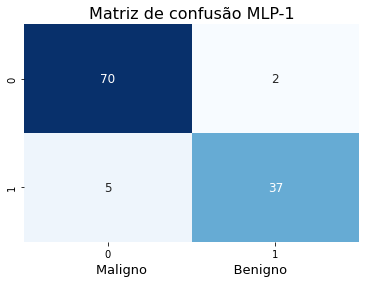

In [5]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão MLP-1', fontsize=16)

# Save the confusion matrix plot as PNG
plt.savefig('confusion_matrix_MLP1.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [6]:
# Create an instance of the MLP model
model = MLP_2()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.7375
Epoch [1/10], Step [10/29], Loss: 0.7054
Epoch [1/10], Step [15/29], Loss: 0.7024
Epoch [1/10], Step [20/29], Loss: 0.6771
Epoch [1/10], Step [25/29], Loss: 0.6723
Epoch [2/10], Step [5/29], Loss: 0.6240
Epoch [2/10], Step [10/29], Loss: 0.5992
Epoch [2/10], Step [15/29], Loss: 0.6133
Epoch [2/10], Step [20/29], Loss: 0.6106
Epoch [2/10], Step [25/29], Loss: 0.5586
Epoch [3/10], Step [5/29], Loss: 0.5346
Epoch [3/10], Step [10/29], Loss: 0.5240
Epoch [3/10], Step [15/29], Loss: 0.5236
Epoch [3/10], Step [20/29], Loss: 0.5108
Epoch [3/10], Step [25/29], Loss: 0.4864
Epoch [4/10], Step [5/29], Loss: 0.4183
Epoch [4/10], Step [10/29], Loss: 0.5114
Epoch [4/10], Step [15/29], Loss: 0.4333
Epoch [4/10], Step [20/29], Loss: 0.5404
Epoch [4/10], Step [25/29], Loss: 0.4642
Epoch [5/10], Step [5/29], Loss: 0.3245
Epoch [5/10], Step [10/29], Loss: 0.3257
Epoch [5/10], Step [15/29], Loss: 0.3338
Epoch [5/10], Step [20/29], Loss: 0.2593
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.9649


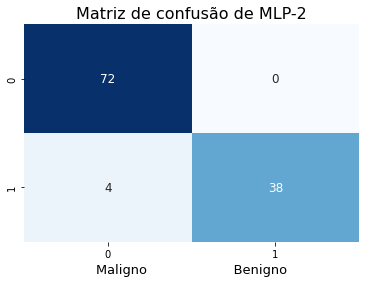

In [7]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão de MLP-2', fontsize=16)

# Save the confusion matrix plot as PNG
plt.savefig('confusion_matrix_MLP2.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [8]:
# Create an instance of the MLP model
model = MLP_3()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Switch to training mode
    for batch, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (batch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [5/29], Loss: 0.6958
Epoch [1/10], Step [10/29], Loss: 0.7019
Epoch [1/10], Step [15/29], Loss: 0.6863
Epoch [1/10], Step [20/29], Loss: 0.7114
Epoch [1/10], Step [25/29], Loss: 0.7058
Epoch [2/10], Step [5/29], Loss: 0.7068
Epoch [2/10], Step [10/29], Loss: 0.6530
Epoch [2/10], Step [15/29], Loss: 0.6260
Epoch [2/10], Step [20/29], Loss: 0.7059
Epoch [2/10], Step [25/29], Loss: 0.6402
Epoch [3/10], Step [5/29], Loss: 0.6759
Epoch [3/10], Step [10/29], Loss: 0.6211
Epoch [3/10], Step [15/29], Loss: 0.6574
Epoch [3/10], Step [20/29], Loss: 0.6661
Epoch [3/10], Step [25/29], Loss: 0.6468
Epoch [4/10], Step [5/29], Loss: 0.5780
Epoch [4/10], Step [10/29], Loss: 0.6026
Epoch [4/10], Step [15/29], Loss: 0.5140
Epoch [4/10], Step [20/29], Loss: 0.6087
Epoch [4/10], Step [25/29], Loss: 0.5999
Epoch [5/10], Step [5/29], Loss: 0.5503
Epoch [5/10], Step [10/29], Loss: 0.5472
Epoch [5/10], Step [15/29], Loss: 0.4897
Epoch [5/10], Step [20/29], Loss: 0.5746
Epoch [5/10], Step [2

Acurácia no conjunto de teste: 0.9649


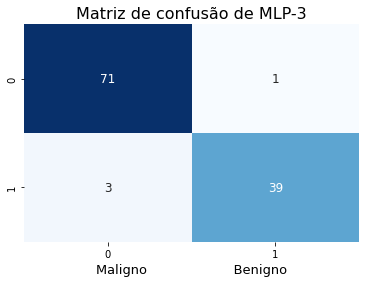

In [9]:
# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(targets.tolist())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})

ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
ax.set_title('Matriz de confusão de MLP-3', fontsize=16)

# Save the confusion matrix plot as PNG
plt.savefig('confusion_matrix_MLP3.png', format='png', bbox_inches='tight', dpi=300)

plt.show()